<a href="https://colab.research.google.com/github/jvrscak/UUIProjekt/blob/main/prvi_zadatak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prvi zadatak - dinamika prometa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
road_length = 100
num_cars = 30
max_speed = 5
p_slow = 0.3
num_steps = 100

In [4]:
road = np.full(road_length, -1)
car_positions = np.random.choice(road_length, num_cars, replace=False)

In [5]:
initial_speeds = np.random.randint(0, max_speed + 1, num_cars)
road[car_positions] = initial_speeds

In [8]:
def update_road(road):
    new_road = np.full_like(road, -1)
    road_length = len(road)
    for i in range(road_length):
        if road[i] != -1:
            speed = road[i]

            if speed < max_speed:
                speed += 1

            distance = 1
            while distance <= speed and road[(i + distance) % road_length] == -1:
                distance += 1
            distance -= 1
            speed = min(speed, distance)

            if speed > 0 and np.random.rand() < p_slow:
                speed -= 1

            new_position = (i + speed) % road_length
            new_road[new_position] = speed
    return new_road

In [9]:
road_history = [road.copy()]
for step in range(num_steps):
    road = update_road(road)
    road_history.append(road.copy())

Kreirali smo 2D polje gdje retci predstavljaju vremenske korake, a stupci položaje na cesti. Vrijednost jedan predstavlja auto, a vrijednost 0 prazno polje.
    Zatim je korišten imshow kako bi se polje prikazalo kao slika.


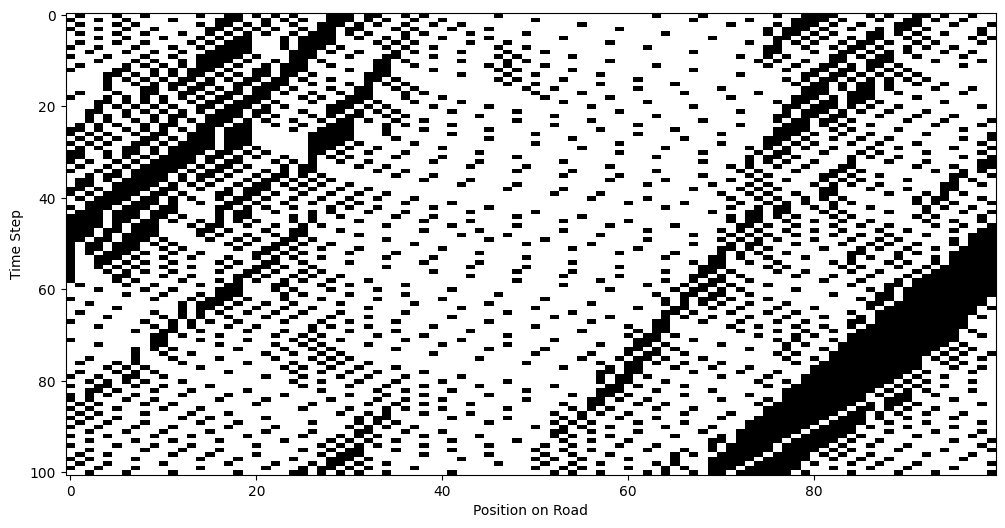

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlabel("Position on Road")
ax.set_ylabel("Time Step")

road_display = []
for state in road_history:
    display_state = np.where(state >= 0, 1, 0)  # 1 for car, 0 for empty
    road_display.append(display_state)
road_display = np.array(road_display)

im = ax.imshow(road_display, cmap="Greys", interpolation="none", aspect="auto")

print(
    """Kreirali smo 2D polje gdje retci predstavljaju vremenske korake, a stupci položaje na cesti. Vrijednost jedan predstavlja auto, a vrijednost 0 prazno polje.
    Zatim je korišten imshow kako bi se polje prikazalo kao slika."""
)

plt.show()